In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_wifi = pd.read_csv('wifi.csv')
df_wifi

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [3]:
print('Null values \n')
print(df_wifi.isnull().sum(), '\n')
print(df_wifi.info())

Null values 

Wifi 1    0
Wifi 2    0
Wifi 3    0
Wifi 4    0
Wifi 5    0
Wifi 6    0
Wifi 7    0
Room      0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi 1  2000 non-null   int64
 1   Wifi 2  2000 non-null   int64
 2   Wifi 3  2000 non-null   int64
 3   Wifi 4  2000 non-null   int64
 4   Wifi 5  2000 non-null   int64
 5   Wifi 6  2000 non-null   int64
 6   Wifi 7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [45]:
x = df_wifi.drop('Room', axis=1)
y = pd.get_dummies(df_wifi.Room)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=42)

print(f'X Train Shape: {x_train.shape}')
print(f'Y Train Shape: {y_train.shape}')
print(f'X Test Shape: {x_test.shape}')
print(f'Y Test Shape: {y_test.shape}')

X Train Shape: (1600, 7)
Y Train Shape: (1600, 4)
X Test Shape: (400, 7)
Y Test Shape: (400, 4)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras import initializers 
from keras import regularizers

<h3>Before Initializers and Regularizers</h3>

In [47]:
L1 = 100
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu'))
model.add(Dense(L2, activation='relu'))
model.add(Dense(L3, activation='relu'))

# output layer
model.add(Dense(4, activation='softmax'))

# adam
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [48]:
adam_history = model.fit(x_train, y_train, 
                         epochs=10,
                         batch_size=100, 
                         validation_data=(x_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 17ms/step - loss: 3.2515 - accuracy: 0.3288 - val_loss: 0.6569 - val_accuracy: 0.8475
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7625 - val_loss: 0.4016 - val_accuracy: 0.9050
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.9413 - val_loss: 0.2537 - val_accuracy: 0.9625
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2289 - accuracy: 0.9694 - val_loss: 0.2111 - val_accuracy: 0.9650
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1707 - accuracy: 0.9688 - val_loss: 0.1652 - val_accuracy: 0.9625
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9694 - val_loss: 0.1400 - val_accuracy: 0.9675
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9712 - val_loss: 0.1279 - val_accuracy: 0.9650
Epoch 8/10
16/16 [=

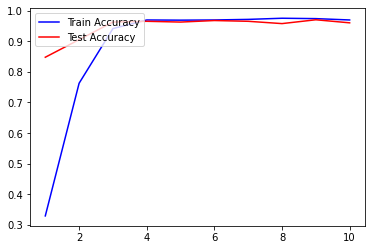

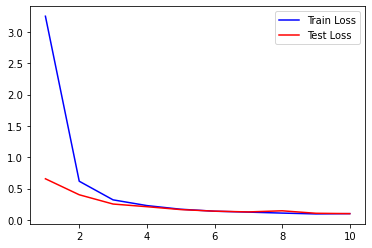

In [49]:
acc = adam_history.history['accuracy']
val_acc = adam_history.history['val_accuracy']
loss = adam_history.history['loss']
val_loss = adam_history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend(loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend(loc='upper right')
plt.show();

<h3>After Initializers and Regularizers</h3

In [55]:
L1 = 100
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)
                ))

model.add(Dense(L2, activation='relu'))
model.add(Dense(L3, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [56]:
adam_history = model.fit(x_train, y_train, 
                         epochs=10,
                         batch_size=100, 
                         validation_data=(x_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 16ms/step - loss: 21.0901 - accuracy: 0.3237 - val_loss: 4.6291 - val_accuracy: 0.3675
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 4.3268 - accuracy: 0.5625 - val_loss: 2.5070 - val_accuracy: 0.7425
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 2.3312 - accuracy: 0.8475 - val_loss: 2.1700 - val_accuracy: 0.8900
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 2.0147 - accuracy: 0.9438 - val_loss: 1.9943 - val_accuracy: 0.9450
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 1.9386 - accuracy: 0.9544 - val_loss: 1.9282 - val_accuracy: 0.9525
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 1.8997 - accuracy: 0.9538 - val_loss: 1.9130 - val_accuracy: 0.9500
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 1.8601 - accuracy: 0.9619 - val_loss: 1.8557 - val_accuracy: 0.9575
Epoch 8/10
16/16 [

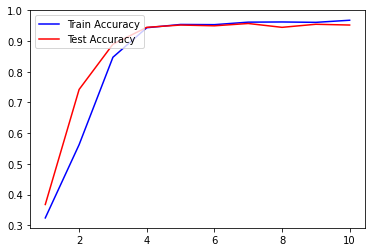

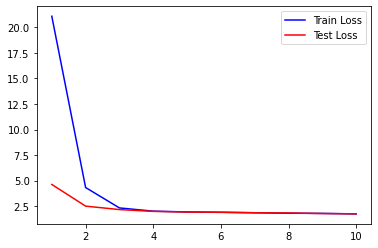

In [57]:
acc = adam_history.history['accuracy']
val_acc = adam_history.history['val_accuracy']
loss = adam_history.history['loss']
val_loss = adam_history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend(loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend(loc='upper right')
plt.show();